In [26]:
import pandas as pd

In [27]:
df=pd.read_csv('data/Census income dataset.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [29]:
###Check for duplicated records
df.duplicated().sum()

24

In [30]:
#drop duplicates

df.drop_duplicates(keep='first',inplace=True)

In [31]:
df.duplicated().sum()        ##Duplicated records removed

0

In [32]:
df.shape

(32537, 15)

In [33]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')
Categorical Columns: Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')


In [34]:
###Observation
#There are total 32537 rows and 15 columns in the dataset
#Categorical features = 9 and Numerical features = 6

In [35]:
df.isnull().sum()   ### Total missing values in each columns

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [36]:
###There is no missing values

In [37]:
for i in df.columns:
    print(df[i].unique())

[90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
[ 77053 132870 186061 ...  34066  84661 257302]
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Unmarried' 'O

In [38]:
import numpy as np

In [44]:
df.replace(' ?',np.nan,inplace=True) #replacing '?' with NaN

In [47]:
import seaborn as sns

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

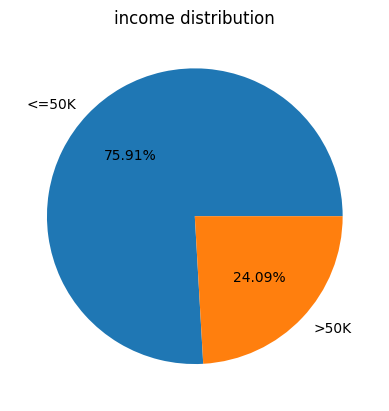

In [41]:
## distribution of our terget varibale -> income
income = df['income'].value_counts()

plt.pie(income,labels=income.index,autopct="%1.2f%%")
plt.title("income distribution")
plt.show()

In [42]:
##observation
#People with <=50K income: 75.91%

#People with >50K income: 24.09%

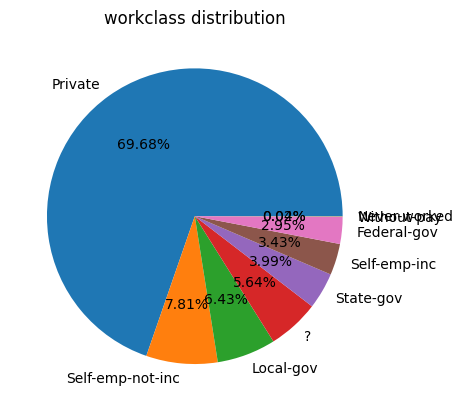

In [43]:
## Distribution of workclass column
temp = df['workclass'].value_counts()

plt.pie(temp,labels=temp.index,autopct="%1.2f%%")
plt.title("workclass distribution")
plt.show()

In [ ]:
##Observation
#

In [25]:
## Relationship between workclass and income

workclass = df.groupby('workclass')['income']

workclass.value_counts()

workclass         income
?                 <=50K      1645
                  >50K        191
Federal-gov       <=50K       589
                  >50K        371
Local-gov         <=50K      1476
                  >50K        617
Never-worked      <=50K         7
Private           <=50K     17712
                  >50K       4961
Self-emp-inc      >50K        622
                  <=50K       494
Self-emp-not-inc  <=50K      1816
                  >50K        724
State-gov         <=50K       945
                  >50K        353
Without-pay       <=50K        14
Name: count, dtype: int64

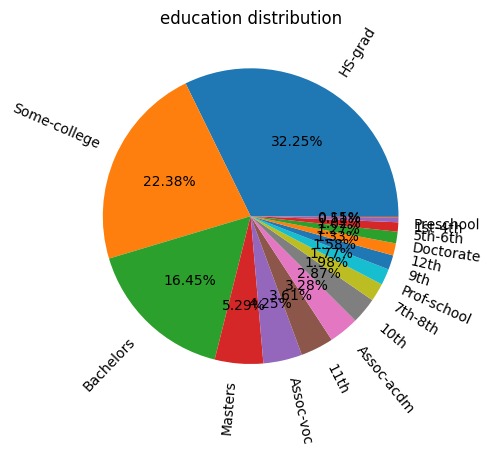

In [49]:
## distribution of education feature

education = df['education'].value_counts()

plt.pie(education,labels=education.index,autopct="%1.2f%%",rotatelabels=True)
plt.title("education distribution")
plt.show()

In [50]:
## Relationship between education and income feature

edu_income = df.groupby('education')['income']
edu_income.value_counts()

education     income
10th          <=50K      871
              >50K        62
11th          <=50K     1115
              >50K        60
12th          <=50K      400
              >50K        33
1st-4th       <=50K      160
              >50K         6
5th-6th       <=50K      316
              >50K        16
7th-8th       <=50K      605
              >50K        40
9th           <=50K      487
              >50K        27
Assoc-acdm    <=50K      802
              >50K       265
Assoc-voc     <=50K     1021
              >50K       361
Bachelors     <=50K     3132
              >50K      2221
Doctorate     >50K       306
              <=50K      107
HS-grad       <=50K     8820
              >50K      1674
Masters       >50K       959
              <=50K      763
Preschool     <=50K       50
Prof-school   >50K       423
              <=50K      153
Some-college  <=50K     5896
              >50K      1386
Name: count, dtype: int64

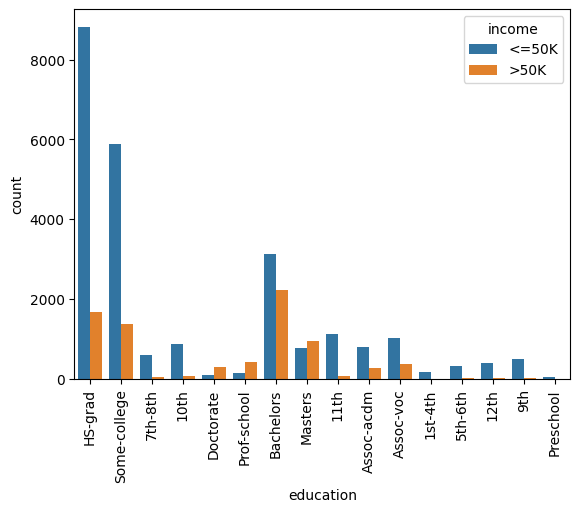

In [51]:
sns.countplot(df,x='education',hue='income')
plt.xticks(rotation=90)
plt.show()

In [52]:
#Observation
#In Bachelors, HS-grad, Masters, Doctorate, Prof-school there are more people who are earning money more than 50K.
#In Master, doctorate and Prof-school - the number of people with income >50K is greater than the number of people with income <=50K

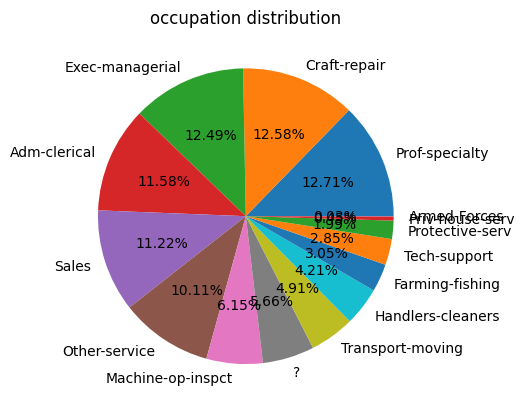

In [55]:
## Distribution of Occupation feature

occupation = df['occupation'].value_counts()

plt.pie(occupation,labels=occupation.index,autopct="%1.2f%%")
plt.title("occupation distribution")
plt.show()

In [60]:
## Relationship between Occupation and income feature
occupation = df.groupby('occupation')['income']
occupation.value_counts()

occupation         income
?                  <=50K     1652
                   >50K       191
Adm-clerical       <=50K     3261
                   >50K       507
Armed-Forces       <=50K        8
                   >50K         1
Craft-repair       <=50K     3165
                   >50K       929
Exec-managerial    <=50K     2097
                   >50K      1968
Farming-fishing    <=50K      877
                   >50K       115
Handlers-cleaners  <=50K     1283
                   >50K        86
Machine-op-inspct  <=50K     1751
                   >50K       249
Other-service      <=50K     3154
                   >50K       137
Priv-house-serv    <=50K      146
                   >50K         1
Prof-specialty     <=50K     2278
                   >50K      1858
Protective-serv    <=50K      438
                   >50K       211
Sales              <=50K     2667
                   >50K       983
Tech-support       <=50K      644
                   >50K       283
Transport-moving   <=5

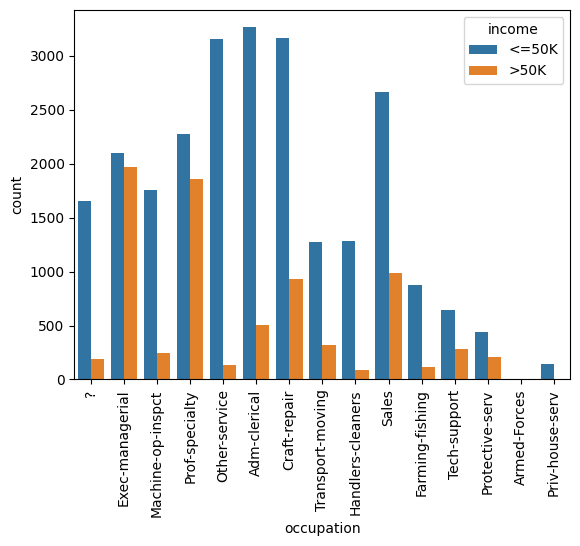

In [56]:
# relationship between occupation and income feature
sns.countplot(df,x='occupation',hue='income')
plt.xticks(rotation=90)
plt.show()

In [57]:
##Observation
# More People are earning >50K in Exec-managerial and Prof-speciality than other groups.

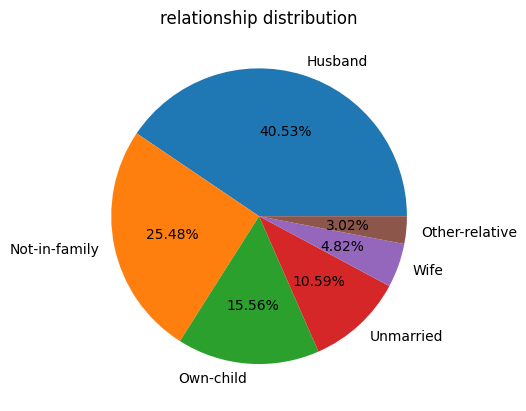

In [63]:
## Distribution of relationship feature

relationship = df['relationship'].value_counts()

plt.pie(relationship,labels=relationship.index,autopct="%1.2f%%")
plt.title("relationship distribution")
plt.show()

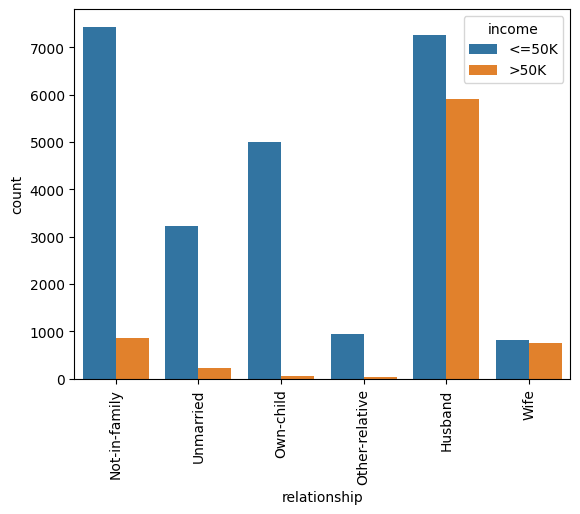

In [65]:
# relationship between relationship and income feature
sns.countplot(df,x='relationship',hue='income')
plt.xticks(rotation=90)
plt.show()

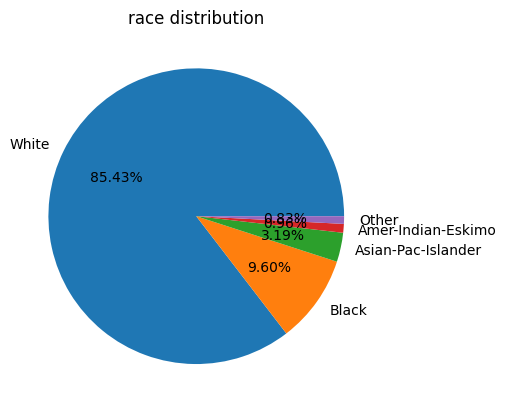

In [66]:
## Distribution of race feature

race = df['race'].value_counts()

plt.pie(race,labels=race.index,autopct="%1.2f%%")
plt.title("race distribution")
plt.show()

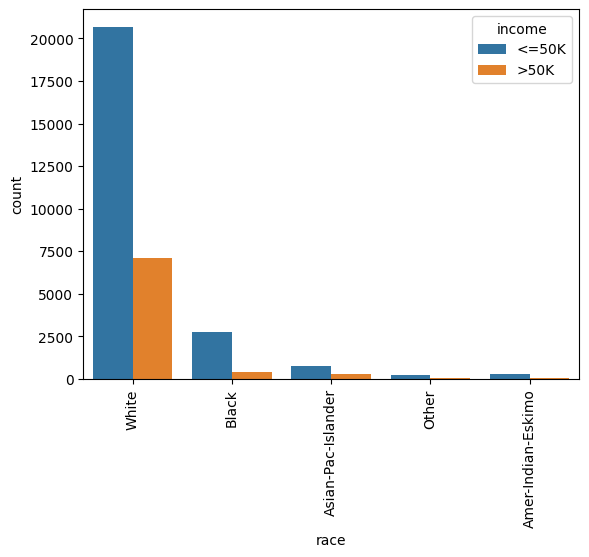

In [67]:
# relationship between race and income feature
sns.countplot(df,x='race',hue='income')
plt.xticks(rotation=90)
plt.show()

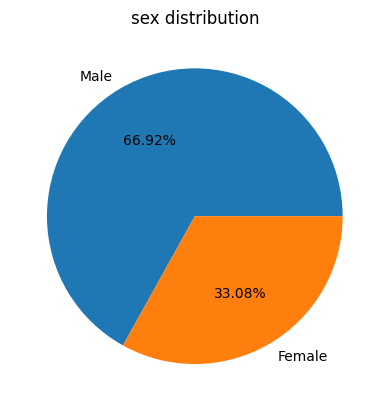

In [68]:
## Distribution of sex feature

sex = df['sex'].value_counts()

plt.pie(sex,labels=sex.index,autopct="%1.2f%%")
plt.title("sex distribution")
plt.show()

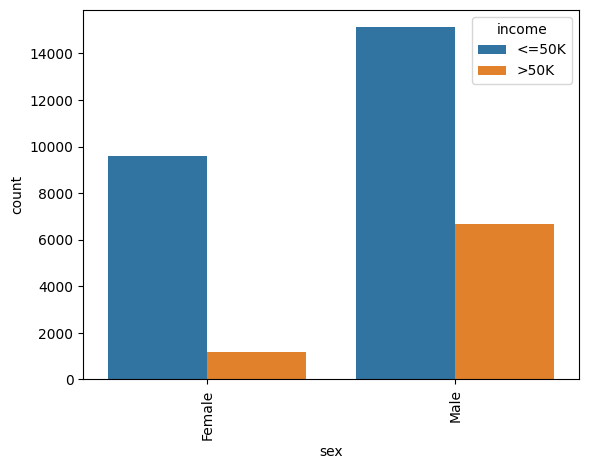

In [69]:
# relationship between sex and income feature
sns.countplot(df,x='sex',hue='income')
plt.xticks(rotation=90)
plt.show()


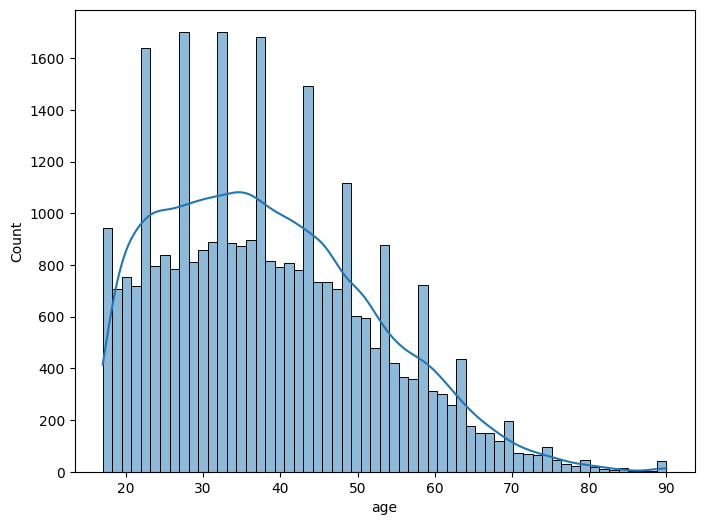

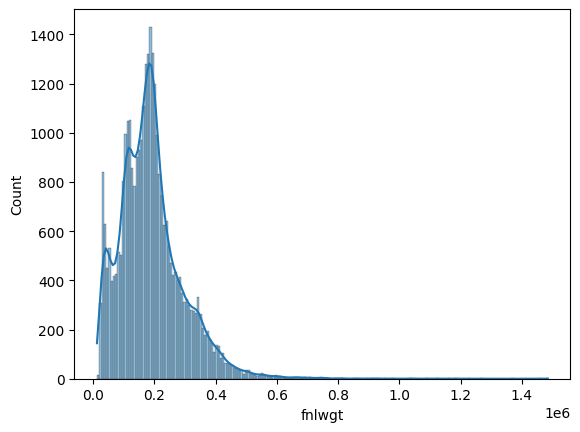

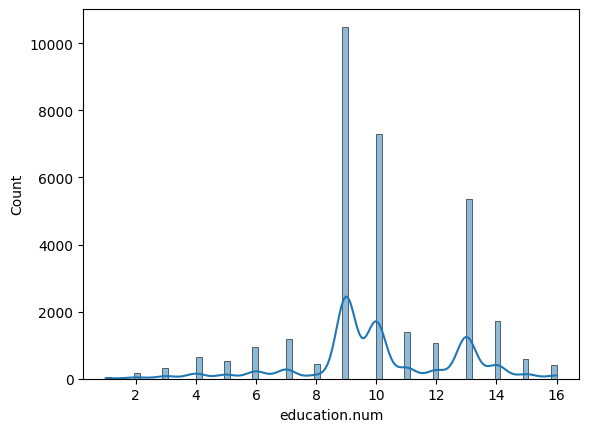

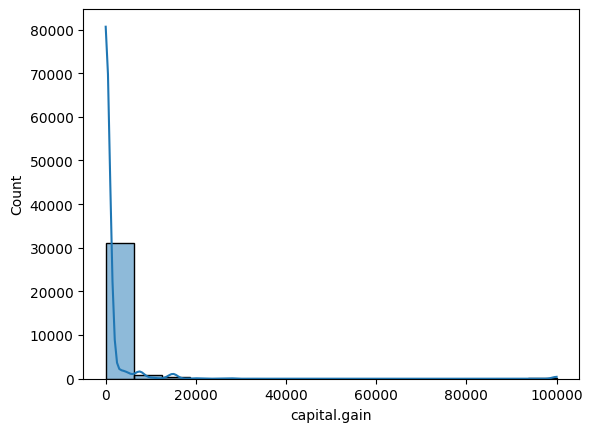

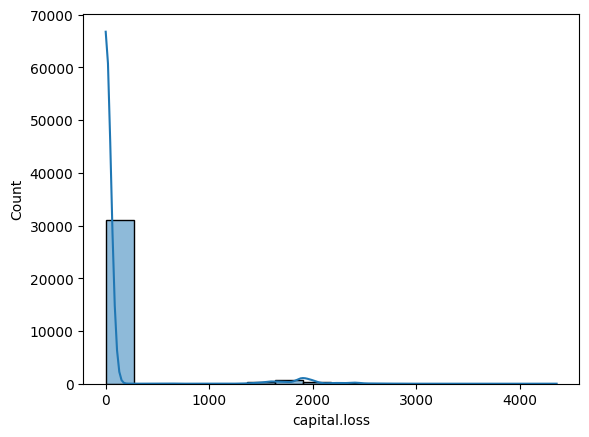

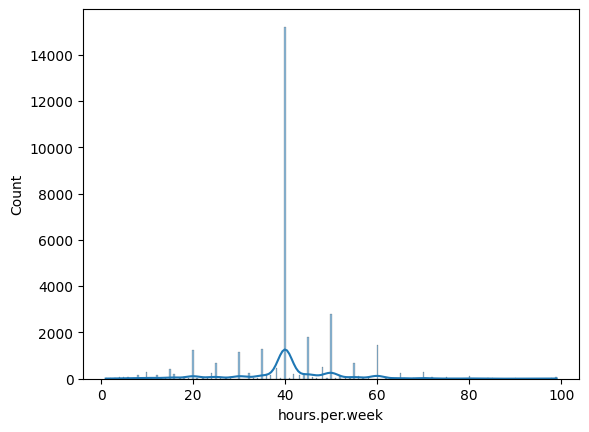

In [71]:
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

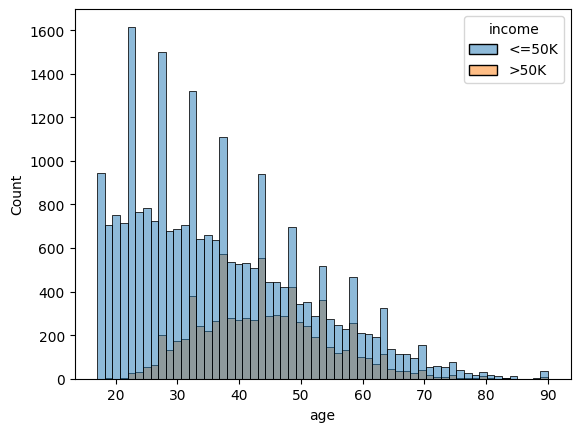

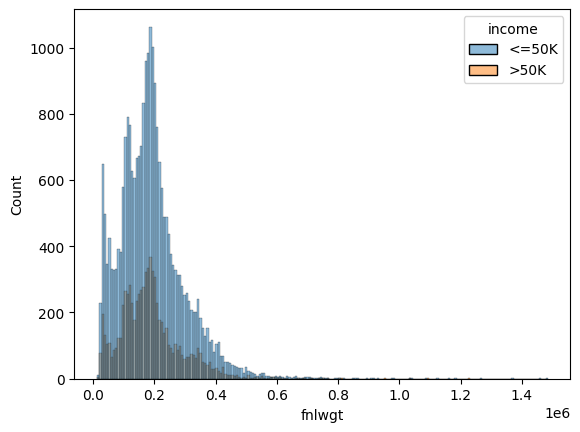

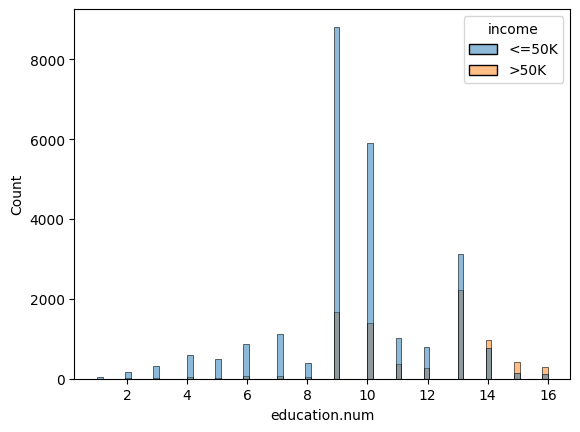

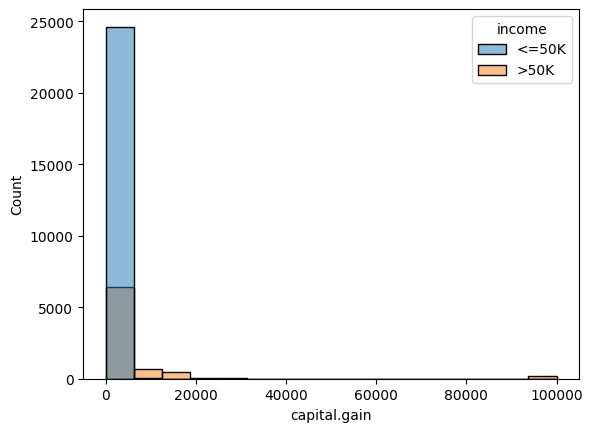

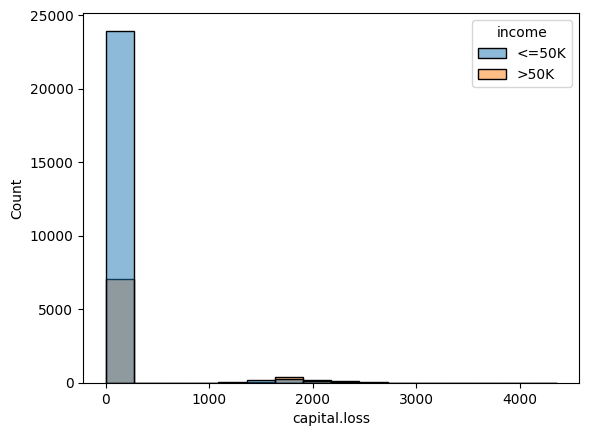

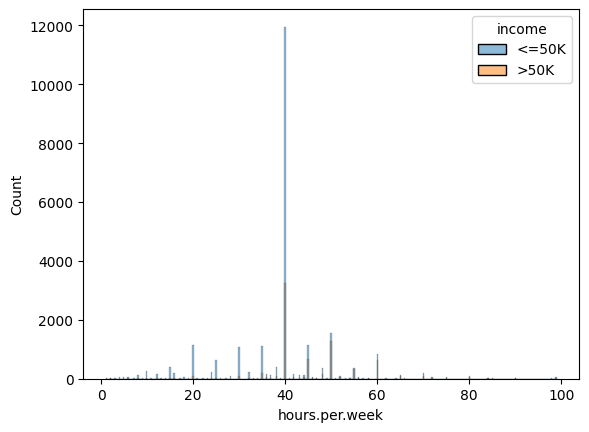

<Figure size 640x480 with 0 Axes>

In [74]:
for i in numerical_columns:
    sns.histplot(df,x=i,hue='income')
    plt.show()

plt.tight_layout()

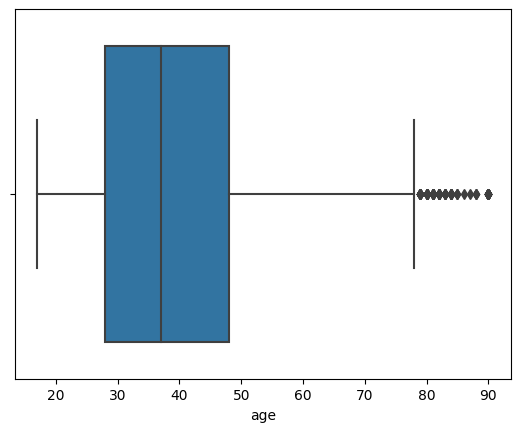

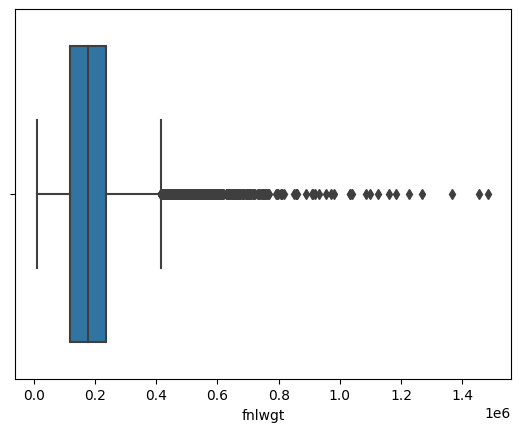

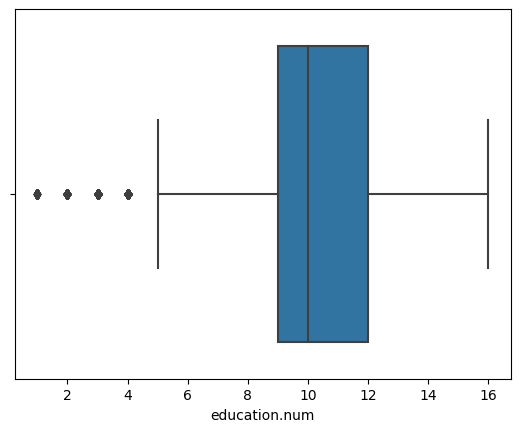

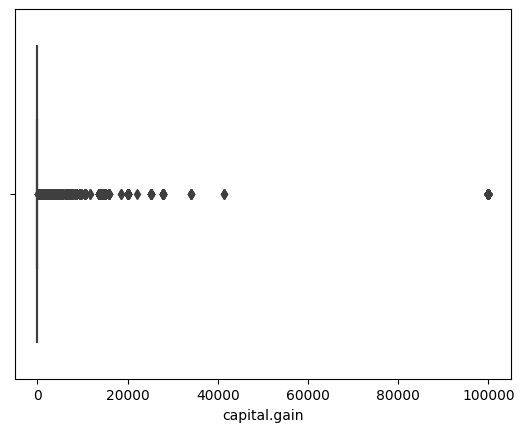

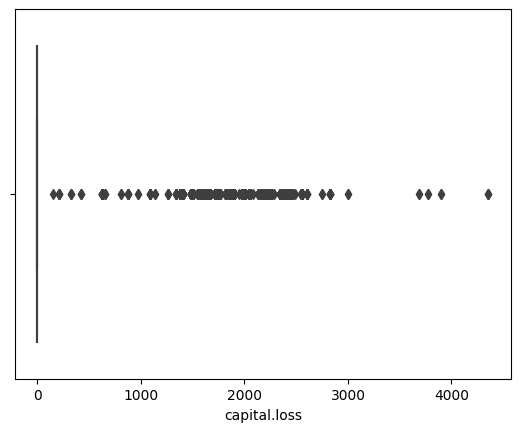

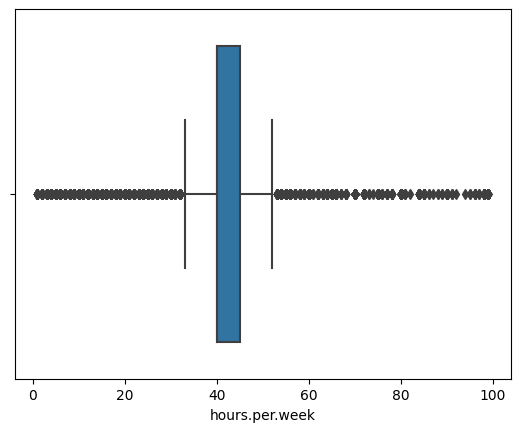

In [76]:
## Checking Outliers

for i in numerical_columns:
    sns.boxplot(x=df[i])
    plt.show()

In [77]:
## Handling target variable income

income_map = {' <=50K':0,' >50K':1}

df['income'] = df['income'].map(income_map)

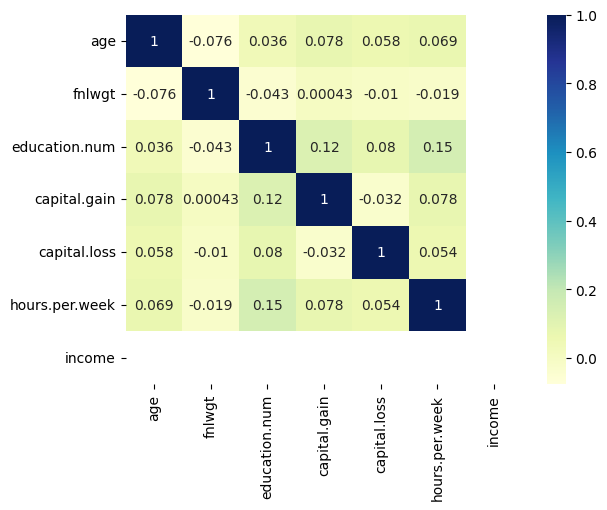

In [79]:
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

In [80]:
##Observation 
#Here, fnlwgt and capital loss has very very les correlation with the output feature
#So, we should drop it

In [82]:
df.drop(labels=['fnlwgt','capital.loss'],axis=1,inplace=True)

In [83]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,hours.per.week,native.country,income
0,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,40,United-States,NaN
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,18,United-States,NaN
2,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,0,40,United-States,NaN
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,40,United-States,NaN
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,40,United-States,NaN
